In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
pd.set_option('display.max_columns',None)
sns.set(style='whitegrid')

In [3]:
#Load the datasets
fear_greed=pd.read_csv("/content/fear_greed_index.csv")
trader_data=pd.read_csv("/content/historical_data.csv")

display(fear_greed.head())

display(trader_data.head())

/tmp/ipython-input-817799728.py:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trader_data=pd.read_csv("/content/historical_data.csv")


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [4]:
fear_greed.shape

(2644, 4)

In [5]:
trader_data.shape

(83805, 16)

In [6]:
fear_greed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [7]:
trader_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83805 entries, 0 to 83804
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account           83805 non-null  object 
 1   Coin              83805 non-null  object 
 2   Execution Price   83805 non-null  float64
 3   Size Tokens       83805 non-null  float64
 4   Size USD          83805 non-null  float64
 5   Side              83805 non-null  object 
 6   Timestamp IST     83805 non-null  object 
 7   Start Position    83805 non-null  float64
 8   Direction         83805 non-null  object 
 9   Closed PnL        83805 non-null  float64
 10  Transaction Hash  83805 non-null  object 
 11  Order ID          83804 non-null  float64
 12  Crossed           83804 non-null  object 
 13  Fee               83804 non-null  float64
 14  Trade ID          83804 non-null  float64
 15  Timestamp         83804 non-null  float64
dtypes: float64(9), object(7)
memory usage: 1

In [8]:
fear_greed.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [9]:
trader_data.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [10]:
trader_data.columns=trader_data.columns.str.lower()

In [11]:
fear_encoded=pd.get_dummies(fear_greed, columns=['classification'], drop_first=False)

In [12]:
for col in fear_encoded.columns:
  if 'classification' in col:
    fear_encoded[col] = fear_encoded[col].astype(int)

In [13]:
fear_encoded.head()

,timestamp,value,date,classification_Extreme Fear,classification_Extreme Greed,classification_Fear,classification_Greed,classification_Neutral
0,1517463000,30,2018-02-01,0,0,1,0,0
1,1517549400,15,2018-02-02,1,0,0,0,0
2,1517635800,40,2018-02-03,0,0,1,0,0
3,1517722200,24,2018-02-04,1,0,0,0,0
4,1517808600,11,2018-02-05,1,0,0,0,0


In [14]:
fear_greed['date']=pd.to_datetime(fear_greed['date'])
trader_data['timestamp ist']=pd.to_datetime(trader_data['timestamp ist'], errors="coerce")

In [15]:
fear_greed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [16]:
trader_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83805 entries, 0 to 83804
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   account           83805 non-null  object        
 1   coin              83805 non-null  object        
 2   execution price   83805 non-null  float64       
 3   size tokens       83805 non-null  float64       
 4   size usd          83805 non-null  float64       
 5   side              83805 non-null  object        
 6   timestamp ist     33950 non-null  datetime64[ns]
 7   start position    83805 non-null  float64       
 8   direction         83805 non-null  object        
 9   closed pnl        83805 non-null  float64       
 10  transaction hash  83805 non-null  object        
 11  order id          83804 non-null  float64       
 12  crossed           83804 non-null  object        
 13  fee               83804 non-null  float64       
 14  trade id          8380

In [17]:
print("\nFear & Greed Summary:\n", fear_greed['classification'].value_counts())
print("\nTrader Data Summary:\n")
display(trader_data.describe())


Fear & Greed Summary:
 classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64

Trader Data Summary:



,execution price,size tokens,size usd,timestamp ist,start position,closed pnl,order id,fee,trade id,timestamp
count,83805.00000,8.380500e+04,8.380500e+04,33950,8.380500e+04,83805.000000,8.380400e+04,83804.000000,8.380400e+04,8.380400e+04
mean,17872.88246,8.041902e+03,9.565005e+03,2025-04-19 15:54:28.237997056,3.114017e+04,89.940930,6.796364e+10,1.914718,5.632300e+14,1.736911e+12
min,0.00001,5.330000e-06,0.000000e+00,2023-01-05 01:06:00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,12.89000,8.426000e-01,2.106900e+02,2025-01-05 10:20:00,-1.838820e+00,0.000000,6.497924e+10,0.009796,2.800000e+14,1.740000e+12
50%,20.33200,2.000000e+01,9.421900e+02,2025-05-02 08:55:00,2.823568e+02,0.000000,7.459489e+10,0.116612,5.620000e+14,1.740000e+12
75%,2725.00000,1.346000e+02,4.145140e+03,2025-10-04 21:15:00,3.325966e+04,11.781280,8.336522e+10,0.697150,8.480000e+14,1.740000e+12
max,108410.00000,1.582244e+07,3.921431e+06,2025-12-04 23:55:00,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12
std,34974.20099,1.606125e+05,5.446986e+04,NaN,5.083886e+05,1281.730975,2.288688e+10,9.552328,3.263928e+14,1.103803e+10


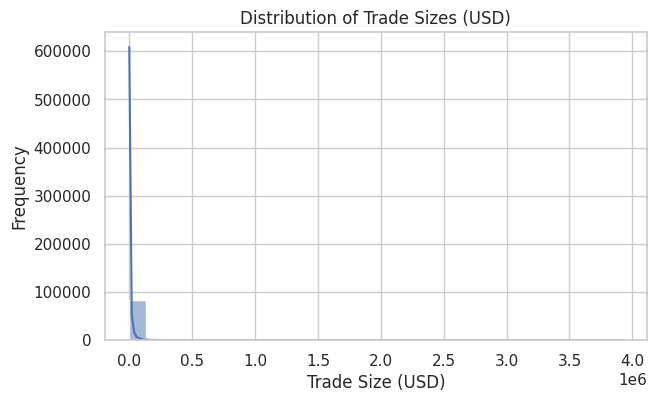

In [18]:
plt.figure(figsize=(7,4))
sns.histplot(trader_data['size usd'], bins=30,kde=True)
plt.title("Distribution of Trade Sizes (USD)")
plt.xlabel("Trade Size (USD)")
plt.ylabel("Frequency")
plt.show()

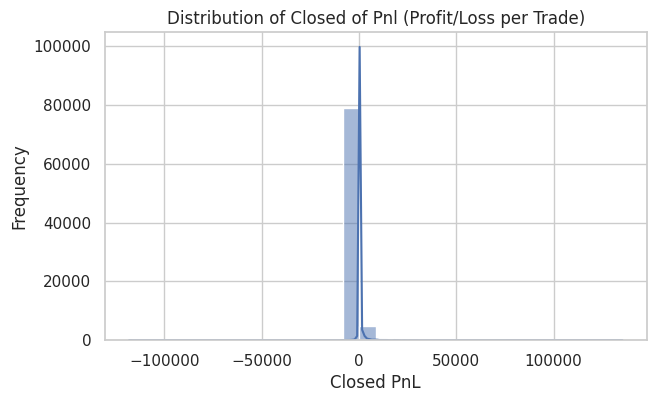

In [19]:
plt.figure(figsize=(7,4))
sns.histplot(trader_data['closed pnl'], bins=30, kde=True)
plt.title("Distribution of Closed of Pnl (Profit/Loss per Trade)")
plt.xlabel("Closed PnL")
plt.ylabel("Frequency")
plt.show()


In [20]:
trader_data['date'] = trader_data['timestamp ist'].dt.date
fear_greed['date'] = pd.to_datetime(fear_greed['date'], errors='coerce').dt.date

merged = pd.merge(trader_data, fear_greed[['date', 'classification']], on='date', how='left')

merged.rename(columns={'classification': 'sentiment'}, inplace=True)

display(merged.head())



,account,coin,execution price,size tokens,size usd,side,timestamp ist,start position,direction,closed pnl,transaction hash,order id,crossed,fee,trade id,timestamp,date,sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,Greed


In [21]:
sentiment_stats=merged.groupby('sentiment')[['closed pnl', 'size usd']].mean().reset_index()

In [22]:
display(sentiment_stats)

,sentiment,closed pnl,size usd
0,Extreme Fear,8.634040,5075.746684
1,Extreme Greed,453.237633,5977.140876
2,Fear,231.592342,9144.973731
3,Greed,99.693646,7419.616079
4,Neutral,37.430126,8181.391005


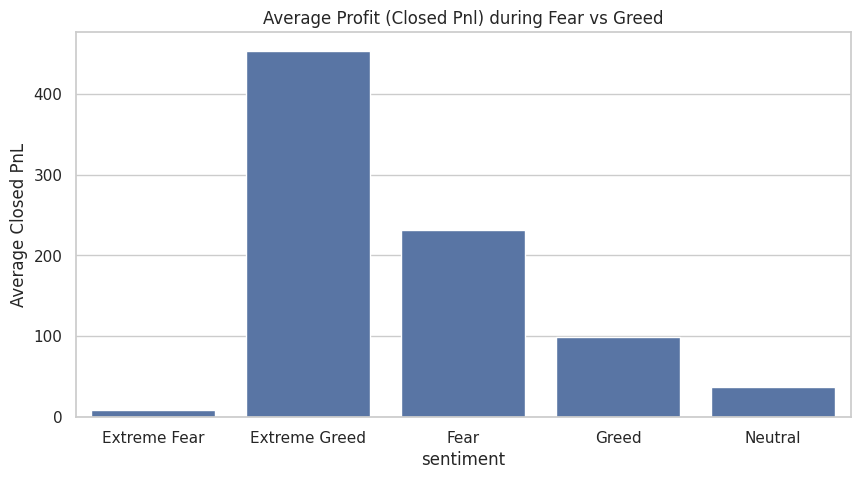

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x='sentiment',y='closed pnl', data=sentiment_stats)
plt.title("Average Profit (Closed Pnl) during Fear vs Greed")
plt.ylabel("Average Closed PnL")
plt.show()

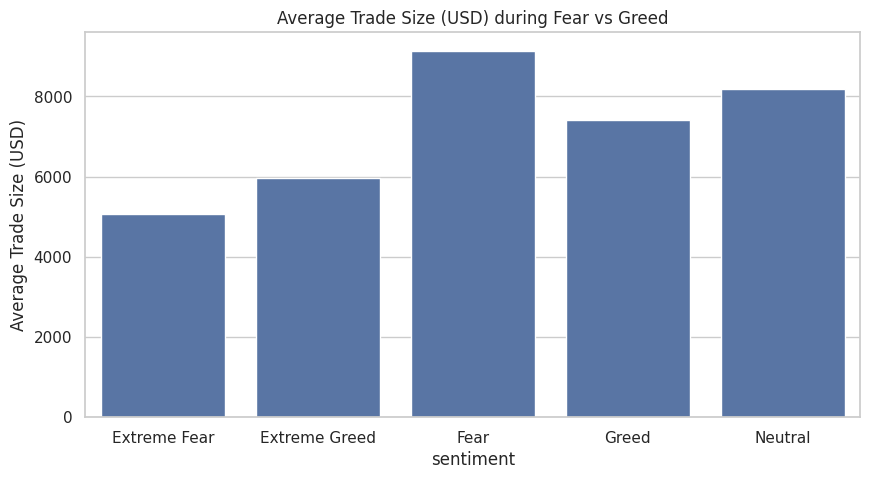

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x='sentiment', y='size usd', data=sentiment_stats)
plt.title('Average Trade Size (USD) during Fear vs Greed')
plt.ylabel('Average Trade Size (USD)')
plt.show()

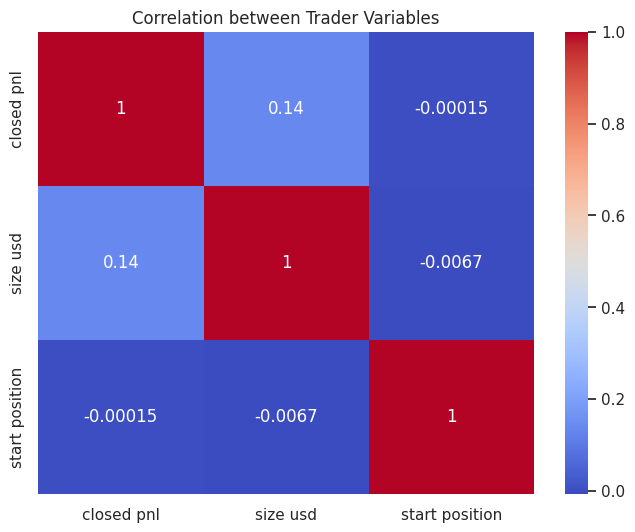

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(merged[['closed pnl', 'size usd', 'start position']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Trader Variables")
plt.show()

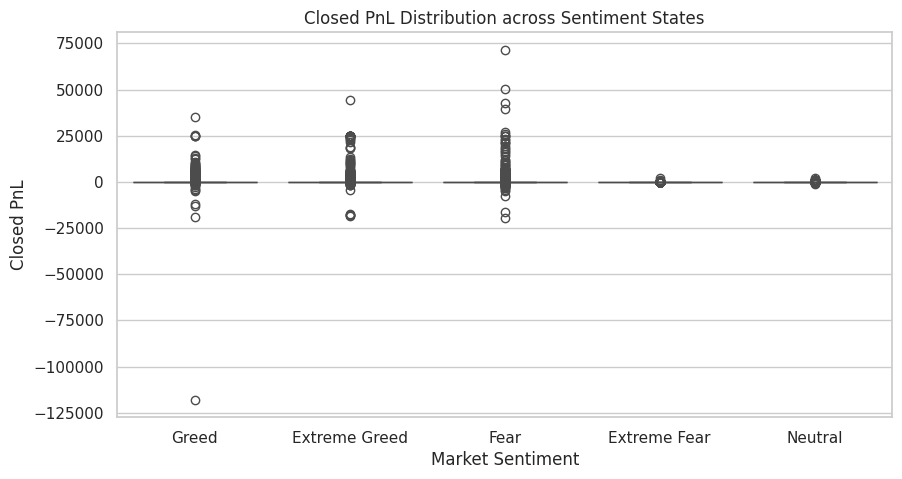

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(x='sentiment', y='closed pnl', data=merged)
plt.title("Closed PnL Distribution across Sentiment States")
plt.xlabel("Market Sentiment")
plt.ylabel('Closed PnL')
plt.show()

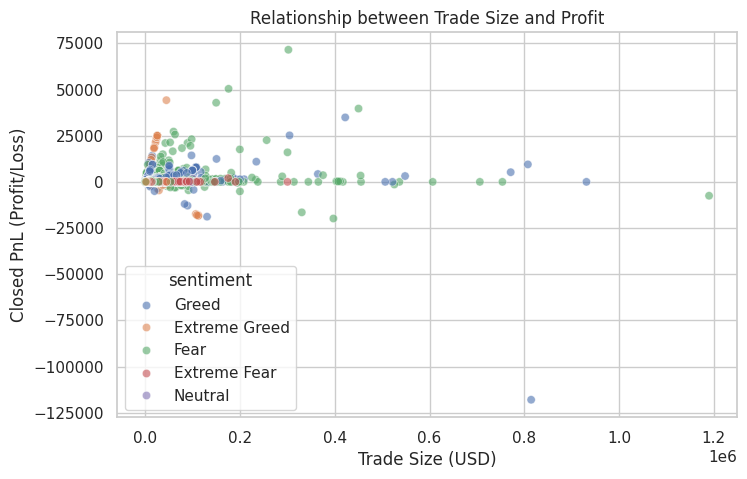

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='size usd', y='closed pnl', hue='sentiment', data=merged, alpha=0.6)
plt.title("Relationship between Trade Size and Profit")
plt.xlabel("Trade Size (USD)")
plt.ylabel("Closed PnL (Profit/Loss)")
plt.show()

/tmp/ipython-input-749500625.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_accounts.values, y=top_accounts.index, palette='viridis')


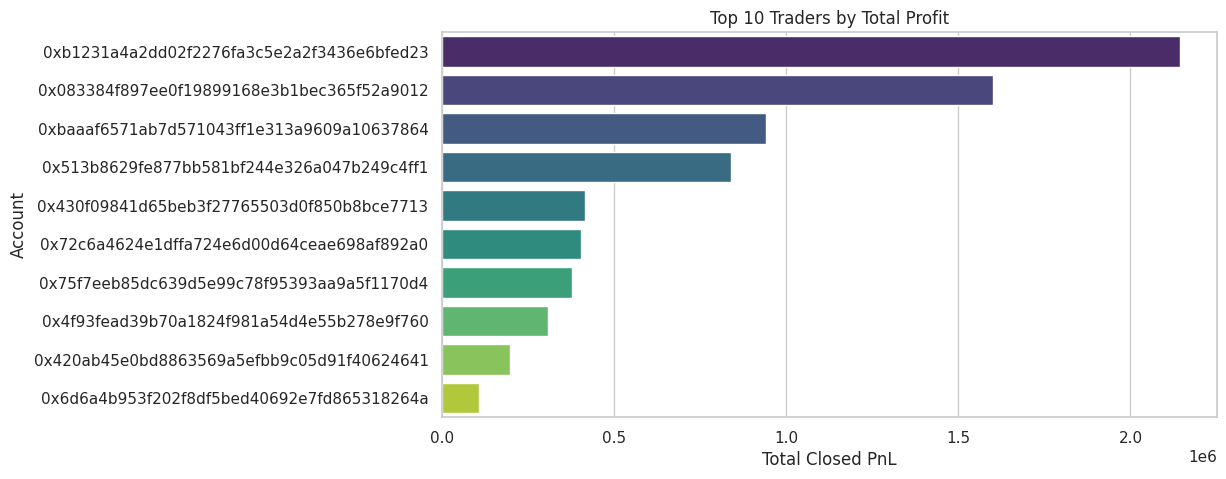

In [28]:
top_accounts = merged.groupby('account')['closed pnl'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_accounts.values, y=top_accounts.index, palette='viridis')
plt.title("Top 10 Traders by Total Profit")
plt.xlabel("Total Closed PnL")
plt.ylabel("Account")
plt.show()
